****
<a id='lesson-3'></a>
# Module :  Integration
****

Computing integrals (numerically) is an important task in many computational fields. In this tutorial we will explore two schemes:
- finite difference schemes / grid schemes
- Monte Carlo scheme

Scipy has 'integrate' function: learn its usage to compuate the 'exact' value of the integral


## Grid schemes
Typically used for 1-D or 2-D integrals, by evaluating the value of the function on a regular grid and then using approximation schemes like 'trapezoidal rule'


## Task-1
Following are the sub-tasks
- Write a function that takes as input a *function* and interval, and returns the value of the integral. Assume the fuction to be one-dimensional function
- Using the above function, find the area of a unit circle

In [43]:
from math import sqrt
import numpy as np
import random
from scipy.stats import norm
import matplotlib.pyplot as plt

In [44]:
def unitCircle(x):
    y = 1 - np.power(x,2)
    return np.sqrt(y)

Half Area of Circle:  1.5707436595231425
Full Area of Circle:  3.141487319046285


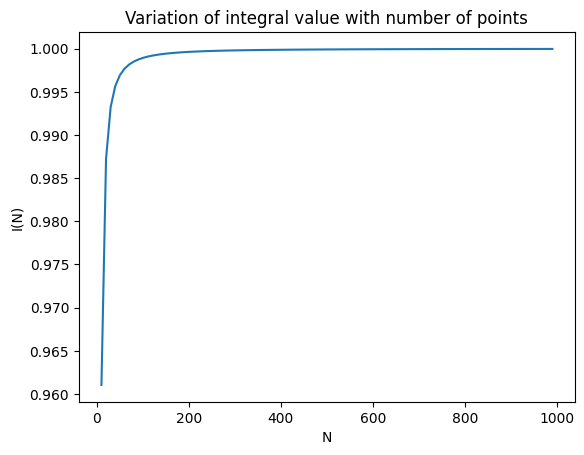

In [45]:
def calculate_integral(func, a, b, no_of_points):
    points = np.linspace(a, b, no_of_points)
    integral = 0
    for i in range(no_of_points - 1):
        x1 = points[i]
        x2 = points[i + 1]
        y1 = func(x1)
        y2 = func(x2)
        area = abs(x2 - x1) * (y1 + y2) / 2
        integral += area
    return integral*2/np.pi

print("Half Area of Circle: ", calculate_integral(unitCircle, -1, 1, 1000)*np.pi/2)
print("Full Area of Circle: ", calculate_integral(unitCircle, -1, 1, 1000)*np.pi)
x_vals = np.arange(10, 1000, 10)
plotlist = []
for x in x_vals:
    integral = calculate_integral(unitCircle, -1, 1, x)
    plotlist.append(integral)

plt.plot(x_vals, plotlist)
plt.xlabel('N')
plt.ylabel('I(N)')
plt.title('Variation of integral value with number of points')
plt.show()

## Task-2
 Exploratory task: Adaptive grid size. When the function changes 'too fast', then next grid point is 'closer' (and change is 'too slow', then next grid point is 'farther'). Using this adaptive scheme compute the area of unit circle.

In [46]:
def derivative(x):
    epsilon = 1e-5
    return ((1/(unitCircle(x)+epsilon))*(-x)) + epsilon

In [47]:
def calculate_integral(func, a, b):
    x = a
    integral = 0
    while x < b:
        h = 1 / np.abs(derivative(x))
        x_next = x + h
        if x_next > b:
            h = b - x
            x_next = b
        integral += h * func(x)
        x = x_next
    return integral

half_area = calculate_integral(unitCircle, -1, 1)
print(f"half area: {half_area}")
full_area = 2 * half_area
print(f"full area: {2 * half_area}")

half area: 1.5072304769513898
full area: 3.0144609539027796


## Monte Carlo methods
Monte Carlo methods are typically used when we have very large dimensional integrals.


## Task-3: Compute the area of the quarter unit circle (1st quadrant)  using simple Monte Carlo method


In [63]:
def compute_area_naive(num_random_pts):
    count = 0
    for _ in range(num_random_pts):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1:
            count += 1
    quarter_circle_area = count / num_random_pts
    return quarter_circle_area

num_random_pts = 1000000
quarter_circle_area = compute_area_naive(num_random_pts)
unit_circle_area = quarter_circle_area * 4
print(unit_circle_area)

3.144236


## Task-4
Simple Monte Carlo is almost never used; here is the 'theory' for a more proper usage...

Let us consider an integral:
$$ I = \int_a^b f(x)~dx$$
where $x\in \mathcal{R}^N$. Such multi-dimensional integrals occur in physics, chemistry, all branches of engineering, and one standard technique is to use Monte Carlo sampling. Below is a rather short presenation of connection between sampling and such integrals

### Multi-dimensional integrals using Monte Carlo sampling

$$I = \int_a^b dx~f(x) = \int_a^b dx~\rho(x) \left( \frac{f(x)}{\rho(x)}\right) =\int_a^b \rho(x)~g(x)~dx $$
with the restriction that $\rho(x)\ne0\forall x\in[a,b]$, and $g(x)={f(x)}/{\rho(x)}$.  

When the fuction $\rho(x)$ statisfies the following conditions:
1. $\rho(x) \ge 0~\forall~x\in[a,b]$
2. $\int_a^b dx~\rho(x) = 1$

such a function can be considered a probability density function.

When $\rho(x)$ is a probability density function,
$$ I = \int_a^b \rho(x)~g(x)~dx = \mathbb{E}_{x\sim\rho}~g(x)= \text{average value of } g(x) \text{ with } x \text{ sampled with probability density }\rho(x)$$
The power of the Monte Carlo method comes from the flexibility in the choice of $\rho(x)$. If $\rho(x)$ is so chosen that it is also large when $|f(x)|$ is large and $\rho(x)$ is small when $|f(x)|$ is small, the efficiency of computing the integral is great. In a proper statistics course, this is demostrated by showing that the variance of computation decreases; this will not be attempted here. The 'Monte Carlo' in the name comes from the fact that random sampling of $x$ with probability density $\rho(x)$; gambling in casinos rely heavily on random numbers.

## Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$

In [49]:
def compute_area_constant(num_random_pts, a, b):
    x = np.random.uniform(a, b, num_random_pts)
    f_x = np.sqrt(1 - x**2)
    mean_f_x = np.mean(f_x)
    density = (b-a) * mean_f_x
    return density

num_random_pts = 1000000
density = compute_area_constant(num_random_pts, -1, 1)
print(f"Half Area = {density}")
print(f"Full Area = {2*density}")

Half Area = 1.5709096968317986
Full Area = 3.141819393663597


## Task 4.2: Compute the area of the circle with $\rho(x)$ being the Gaussian distribution (i.e. normal distribution)

In [50]:
def gaussian(mu, sigma, size=1):
    return norm.rvs(mu, sigma, size=size)

In [51]:
def compute_area_gaussian(num_random_pts, a, b):
    gauss_arr = []
    x = gaussian(0, 1, num_random_pts)
    mask = (x<b) & (x>a)
    x_masked = x[mask]
    f_x = np.sqrt(1 - np.abs(x_masked)**2)
    N_x = norm.pdf(x_masked)
    gauss_arr.append(f_x/N_x)
    sum_f_x = np.sum(gauss_arr)
    return sum_f_x/num_random_pts

num_random_pts = 1000000
density = compute_area_gaussian(num_random_pts, -1, 1)
print(f"Half Area = {density}")
print(f"Full Area = {2*density}")

Half Area = 1.5727908154896986
Full Area = 3.145581630979397


## Task-5 One simple measure of efficiency of computation

What is possible is to check that the efficiency of computation: how 'fast' is the computation? Smaller is the number of function evaluations used, greater is the efficiency. Alternatively, for the same number of function evaluations, lower error would mean greater efficiency.

Compute the graph of $N$ vs $error(N)$ where $N$ is the number of function computations, under various schemes listed below:
1. Naive Monte Carlo
2. Importance Sampling with uniform  distrituion
3. Importance Sampling with Gaussian districutuion

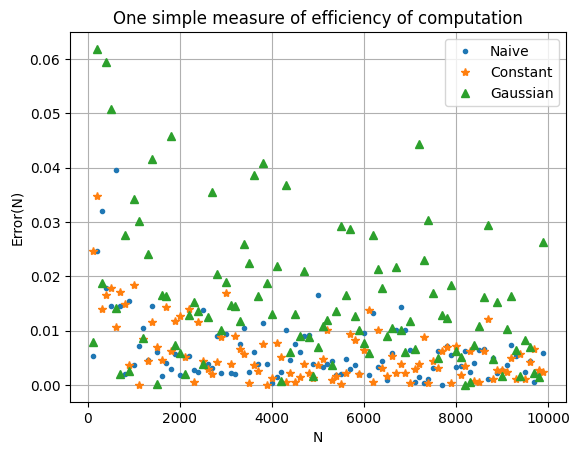

In [52]:
N = [i for i in range(100, 10000, 100)]
err_naive = []
err_constant = []
err_gaussian = []
for i in N:
    err_naive.append(abs(compute_area_naive(i) - (np.pi/4)))
    err_constant.append(abs(compute_area_constant(i, -1, 1) - (np.pi)/2))
    err_gaussian.append(abs(compute_area_gaussian(i, -1, 1) - (np.pi)/2))

plt.plot(N, err_naive, '.', label='Naive')
plt.plot(N, err_constant,'*', label='Constant')
plt.plot(N, err_gaussian,'^', label='Gaussian')
plt.legend()
plt.grid()
plt.xlabel('N')
plt.ylabel('Error(N)')
plt.title("One simple measure of efficiency of computation")
plt.show()

# WORKBOOK STARTS from here

# Grid Based scheme (Task-1)

 We will plot the area of the unit semi-circle (i.e. unit circle with $y>0$). We know that the exact area of the unit semi-circle is $\pi/2$. So to show the assymptotic convergence with respect to the number of intervals ($N$), we will plot $I(N) / (\pi/2)$, which will assymptotically tend to $1$ as $N\rightarrow\infty$

In [53]:
from math import sqrt
import numpy as np
import random
from scipy.stats import norm
import matplotlib.pyplot as plt
from math import sqrt

In [54]:
def unitCircle(x):
    y = 1 - np.power(x,2)
    return np.sqrt(y)

Half Area of Circle:  1.5707436595231425
Full Area of Circle:  3.141487319046285


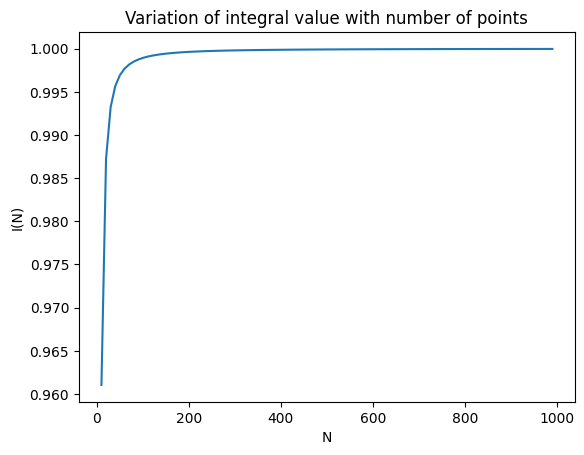

In [55]:
def calculate_integral(func, a, b, no_of_points):
    points = np.linspace(a, b, no_of_points)
    integral = 0
    for i in range(no_of_points - 1):
        x1 = points[i]
        x2 = points[i + 1]
        y1 = func(x1)
        y2 = func(x2)
        area = abs(x2 - x1) * (y1 + y2) / 2
        integral += area
    return integral*2/np.pi

print("Half Area of Circle: ", calculate_integral(unitCircle, -1, 1, 1000)*np.pi/2)
print("Full Area of Circle: ", calculate_integral(unitCircle, -1, 1, 1000)*np.pi)
x_vals = np.arange(10, 1000, 10)
plotlist = []
for x in x_vals:
    integral = calculate_integral(unitCircle, -1, 1, x)
    plotlist.append(integral)

plt.plot(x_vals, plotlist)
plt.xlabel('N')
plt.ylabel('I(N)')
plt.title('Variation of integral value with number of points')
plt.show()
plt.show()

# Adaptive grid method (Task-2)

## Homework
Generic idea is the following:
1. $x_0 = a$ and set $i=0$
2. for $ x_i < b$, do the following:
     1. $h_i = ?$ ; choose $h_i$ inversely proportional to absolute value of the derivative, $|f^\prime(x_i)|$
     2. $x_{i+1} = x_{i} + h_i$
     3. compute the contribution of this interval to integral
     3. check $x_{i+1} < b$, if yes end of the interval reached; else increase $i$

In [56]:
def derivative(x):
    epsilon = 1e-5
    return ((1/(unitCircle(x)+epsilon))*(-x)) + epsilon

In [57]:
def calculate_integral(func, a, b):
    x = a
    integral = 0
    while x < b:
        h = 1 / np.abs(derivative(x))
        x_next = x + h
        if x_next > b:
            h = b - x
            x_next = b
        integral += h * func(x)
        x = x_next
    return integral

half_area = calculate_integral(unitCircle, -1, 1)
print(f"Half Area: {half_area}")
full_area = 2 * half_area
print(f"Full Area: {2 * half_area}")

Half Area: 1.5072304769513898
Full Area: 3.0144609539027796


# Task-3  
Area of quarter circle using naive Monte Carlo


Consider a unit square. Generate $N$ random points _inside_ this square. Consider the quarter circle (or any other shape) that is completely inside the square. We can estimate the are of the quarter circle by using the probilistic argument that the ratio of areas of quarter circle and square equals the fraction of points that lie inside the quarter circle. That is:
$$ \frac{A_c}{A_s} = \lim_{N_s \rightarrow\infty}\frac{N_c}{N_s}
$$
where subsrcipt $c$ and $s$ are used to denote properties of quarter-circle and square respectively; and $A$ stands for area and $N$ stands for number of points
1. function ComputeQuarterCircleArea(num_random_pts)
2. for each pt in range(num_random_pts):
        set pt = (random x, random y)
        check if pt is inside the circle
3. Estimate area of the quarter cicle.

In [58]:
def compute_area_naive(num_random_pts):
    count = 0
    for _ in range(num_random_pts):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1:
            count += 1
    quarter_circle_area = count / num_random_pts
    return quarter_circle_area

num_random_pts = 1000000
quarter_circle_area = compute_area_naive(num_random_pts)
unit_circle_area = quarter_circle_area * 4
print(f"Area of Circle = {unit_circle_area}")

Area of Circle = 3.142116


## Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$

MonteCarlo_Uniform(f, a, b, num_points): to integrate f in x in [a,b] using num_point samples of uniform distribution

In [59]:
def compute_area_constant(num_random_pts, a, b):
    x = np.random.uniform(a, b, num_random_pts)
    f_x = np.sqrt(1 - x**2)
    mean_f_x = np.mean(f_x)
    density = (b-a) * mean_f_x
    return density

num_random_pts = 1000000
density = compute_area_constant(num_random_pts, -1, 1)
print(f"Half Area = {density}")
print(f"Full Area = {2*density}")

Half Area = 1.57050245183682
Full Area = 3.14100490367364


## Task 4.2: Similar to  Task 4.1

In [60]:
def gaussian(mu, sigma, size=1):
    return norm.rvs(mu, sigma, size=size)

In [61]:
def compute_area_gaussian(num_random_pts, a, b):
    gauss_arr = []
    x = gaussian(0, 1, num_random_pts)
    mask = (x<b) & (x>a)
    x_masked = x[mask]
    f_x = np.sqrt(1 - np.abs(x_masked)**2)
    N_x = norm.pdf(x_masked)
    gauss_arr.append(f_x/N_x)
    sum_f_x = np.sum(gauss_arr)
    return sum_f_x/num_random_pts

num_random_pts = 1000000
density = compute_area_gaussian(num_random_pts, -1, 1)
print(f"Half Area = {density}")
print(f"Full Area = {2*density}")

Half Area = 1.5717632727542001
Full Area = 3.1435265455084003


## Task 5: One simple measure of efficiency of computation

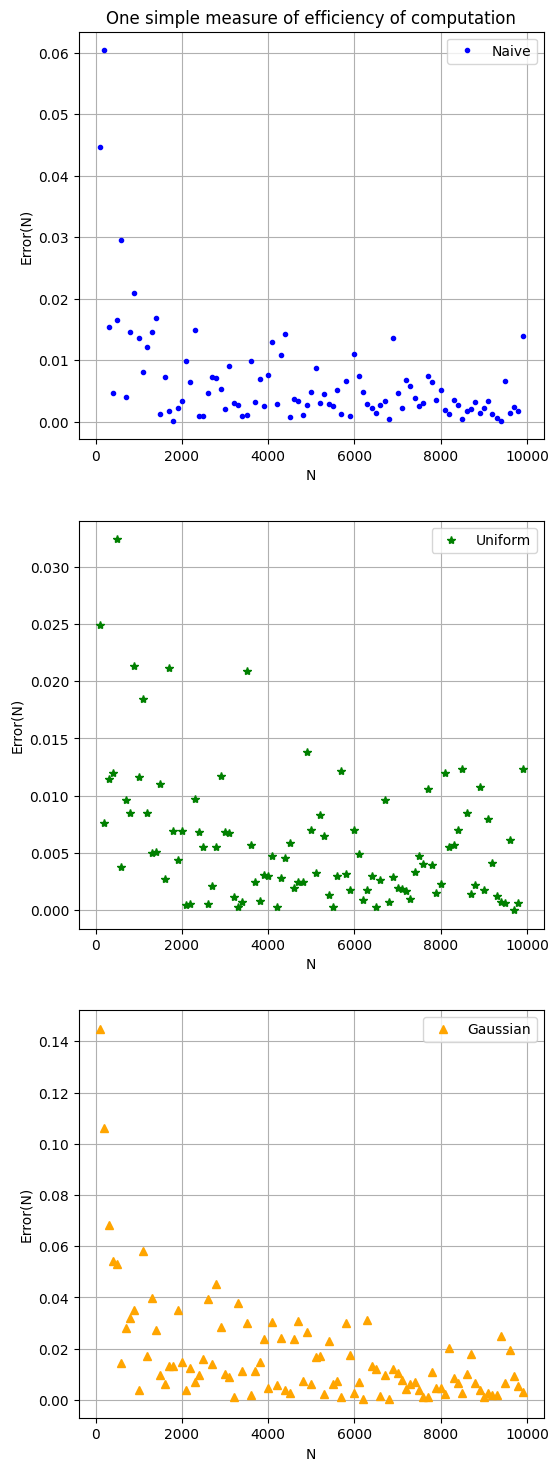

In [62]:
N = [i for i in range(100, 10000, 100)]
err_naive = []
err_constant = []
err_gaussian = []
for i in N:
    err_naive.append(abs(compute_area_naive(i) - (np.pi/4)))
    err_constant.append(abs(compute_area_constant(i, -1, 1) - (np.pi)/2))
    err_gaussian.append(abs(compute_area_gaussian(i, -1, 1) - (np.pi)/2))

fig, axs = plt.subplots(3, figsize=(6, 18))

axs[0].plot(N, err_naive, '.', label='Naive', color = 'blue')
axs[0].set_title('One simple measure of efficiency of computation')
axs[0].set_xlabel('N')
axs[0].set_ylabel('Error(N)')
axs[0].grid()
axs[0].legend()

axs[1].plot(N, err_constant,'*', label='Uniform', color = 'green')
axs[1].set_xlabel('N')
axs[1].set_ylabel('Error(N)')
axs[1].grid()
axs[1].legend()

axs[2].plot(N, err_gaussian,'^', label='Gaussian', color = 'orange')
axs[2].set_xlabel('N')
axs[2].set_ylabel('Error(N)')
axs[2].grid()
axs[2].legend()

plt.show()